<a href="https://colab.research.google.com/github/Manoj-Routhu/sentiment-analysis/blob/main/DataX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=d8e8e2531ce7de87cd7f7786b5eb135a64558ab46bae18e95f6edaa5446f2d38
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-n

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=ce454fb733a65df509fa65f91b4fd34aa57d3d32c3907589d4267a7c7d927596
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [ ]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
consumerKey = "8SokfXDnGAI5xFzq5i4N7mz80"
consumerSecret = "AVPd5cj9aFFEerVPwTKyjeuJtoNnrVVnyo3PC4tHwI41uEKq99"
accessToken = "1393472744306532360-FGdHBhF3XAtTD8DgSuSo7EgyZ3s1uq"
accessTokenSecret = "9nprttwHGvAbZhjVQgQ3JL6UuO3Nd6Wgg5hB3N3Meyal2"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)
#AAAAAAAAAAAAAAAAAAAAAOiJjQEAAAAASi%2BwSYkR%2FMqOK26umMe7KknIrLA%3DwaUTXuoTURnxinQdFYrAcUEe2PEiEQxRLU1Gz8C5ampyAn5nDp

In [ ]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
  negative_list.append(tweet.text)
  negative += 1
 elif pos > neg:
  positive_list.append(tweet.text)
  positive += 1
 
 elif pos == neg:
  neutral_list.append(tweet.text)
  neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: review
Please enter how many tweets to analyze: 2500


In [ ]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive sentiment: ",len(positive_list))
print("negative sentiment: ", len(negative_list))
print("neutral sentiment: ",len(neutral_list))

total number:  2500
positive sentiment:  877
negative sentiment:  396
neutral sentiment:  1227


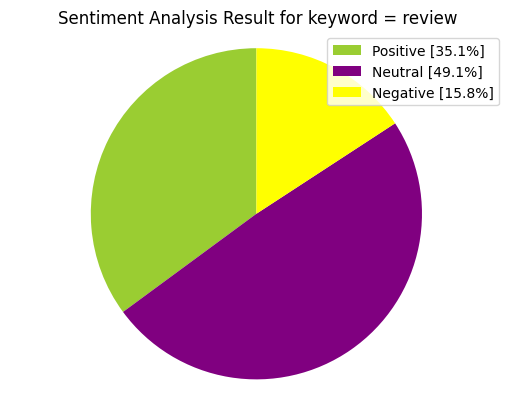

,0
0,Selalu cv ke ibuk karena baik banget dan cepat...
1,RT @BWCISU: This question built on a @UNIDIR @...
2,RT @GemsOfBollywood: Among a spate of films in...
3,Cybeart Apex Series Signature Edition review: ...
4,RT @thehoneypop: BREAKING: #FaithInTheFuture i...
...,...
2495,Implications of the endocannabinoid system and...
2496,A lovely comment from a #madhoney customer mak...
2497,RT @kentparktweet: When Costello’s Australian ...
2498,RT @verritaee: D'FESTA THE MOVIE - BTS (D'FES...


In [ ]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'purple','yellow']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword = "+keyword+"" )
plt.axis('equal')
plt.show()

tweet_list


In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([-⁰9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Selalu cv ke ibuk karena baik banget dan cepat...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,RT @BWCISU: This question built on a @UNIDIR @...,\n\n ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,RT @GemsOfBollywood: Among a spate of films in...,...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
3,Cybeart Apex Series Signature Edition review: ...,: ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
4,RT @thehoneypop: BREAKING: #FaithInTheFuture i...,: # ' ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
5,🗞—Cabinet Approves new Rent Bill.\n\n—“The rev...,🗞— .\n\n—“ ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
6,https://t.co/MvqrpxGHiE via @SueWall61433384,:// . / 61433384,0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,ASUS Zenfone Go 完全攻略マスター 9．Zenfone Goの便利な機能を紹介...,完全攻略マスター ． の便利な機能を紹介...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,That would be due to certain facts he said whi...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
9,"pano ba ‘yan next month pa exam namin, naga-ad...","‘ , ...",0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']

 if neg > pos:
   tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
   tw_list.loc[index, 'sentiment'] = "positive"
 else:
   tw_list.loc[index, 'sentiment'] = "neutral"
   tw_list.loc[index, 'neg'] = neg
   tw_list.loc[index, 'neu'] = neu
   tw_list.loc[index, 'pos'] = pos
   tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Selalu cv ke ibuk karena baik banget dan cepat...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,RT @BWCISU: This question built on a @UNIDIR @...,\n\n ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,RT @GemsOfBollywood: Among a spate of films in...,...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
3,Cybeart Apex Series Signature Edition review: ...,: ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
4,RT @thehoneypop: BREAKING: #FaithInTheFuture i...,: # ' ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
5,🗞—Cabinet Approves new Rent Bill.\n\n—“The rev...,🗞— .\n\n—“ ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
6,https://t.co/MvqrpxGHiE via @SueWall61433384,:// . / 61433384,0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,ASUS Zenfone Go 完全攻略マスター 9．Zenfone Goの便利な機能を紹介...,完全攻略マスター ． の便利な機能を紹介...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,That would be due to certain facts he said whi...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
9,"pano ba ‘yan next month pa exam namin, naga-ad...","‘ , ...",0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,1784,99.89
negative,1,0.06
positive,1,0.06


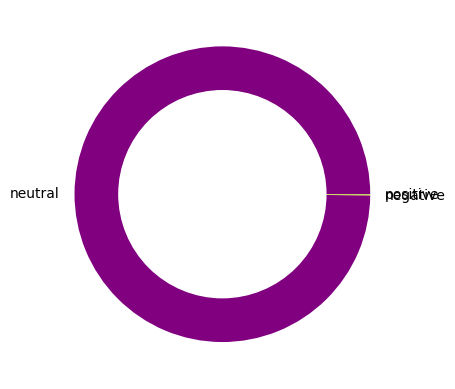

In [ ]:
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['purple', 'yellow' ,'yellowgreen'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [ ]:

tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,9.0
neutral,7.4
positive,18.0


In [ ]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))



In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [ ]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords 
    return text

tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Selalu cv ke ibuk karena baik banget dan cepat...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,140,5,...,"[, ]","[, ]","[, ]"
1,RT @BWCISU: This question built on a @UNIDIR @...,\n\n ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,110,6,\n\n ...,"[, ]","[, ]","[, ]"
2,RT @GemsOfBollywood: Among a spate of films in...,...,0.0,0.0,neutral,0.0,0.0,0.0,0.0,120,2,...,"[, ]","[, ]","[, ]"
3,Cybeart Apex Series Signature Edition review: ...,: ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,93,5,...,"[, ]","[, ]","[, ]"
4,RT @thehoneypop: BREAKING: #FaithInTheFuture i...,: # ' ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0,124,9,...,"[, ]","[, ]","[, ]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,@review_retained Nee thala fan ila? https://t....,_ ? :// . / 6 ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,53,6,,"[, ]","[, ]","[, ]"
2492,Halloween is over. But here's our review of Gu...,. ' ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,123,8,...,"[, ]","[, ]","[, ]"
2495,Implications of the endocannabinoid system and...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,139,4,...,"[, ]","[, ]","[, ]"
2496,A lovely comment from a #madhoney customer mak...,# ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,135,12,...,"[, ]","[, ]","[, ]"
